In [1]:
# Dependencies
import pandas as pd
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

#%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
# display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fac80ec02e0>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date, Measurement.tobs).filter(
    extract('month', Measurement.date) == 6).all()
print(june)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
#  3. Convert the June temperatures to a list.
# remove 'Measurement.date'
june = session.query(Measurement.tobs).filter(
    extract('month', Measurement.date) == 6).all()
print(june)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june)
df = df.rename(columns={'tobs':'June Temps'})
print(df)

      June Temps
0           78.0
1           76.0
2           78.0
3           76.0
4           77.0
...          ...
1695        79.0
1696        74.0
1697        74.0
1698        76.0
1699        75.0

[1700 rows x 1 columns]


In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


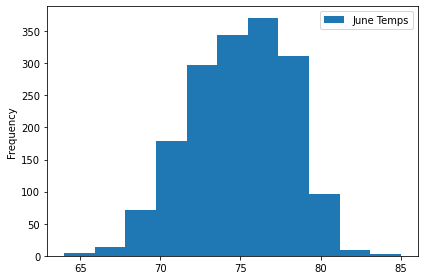

In [11]:
# plot the temp. observations
df.plot.hist(bins=11)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec = session.query(Measurement.date, Measurement.tobs).filter(
    extract('month', Measurement.date) == 12).all()
print(dec)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [13]:
# 7. Convert the December temperatures to a list.
dec = session.query(Measurement.tobs).filter(
    extract('month', Measurement.date) == 12).all()
print(dec)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December.
df = pd.DataFrame(dec)
df = df.rename(columns={'tobs': 'December Temps'})
print(df)

      December Temps
0               76.0
1               74.0
2               74.0
3               64.0
4               64.0
...              ...
1512            71.0
1513            71.0
1514            69.0
1515            65.0
1516            65.0

[1517 rows x 1 columns]


In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


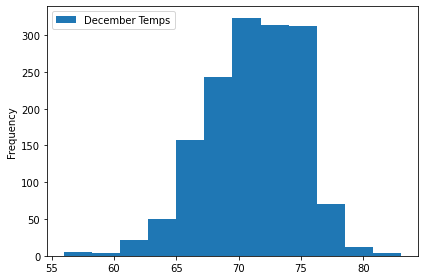

In [18]:
# plot the temp. observations
df.plot.hist(bins=12)
plt.tight_layout()

## Two more queries
### 1. June - examine both precipitation and temp

In [58]:
# extracts date, precipitation, and temperature for the month of june 
june_prcp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(
    extract('month', Measurement.date) == 6).all()

In [59]:
# df
june_prcp = pd.DataFrame(june_prcp, columns=['date','precipitation','tobs' ])

In [60]:
# drop index
print(june_prcp.to_string(index=False))

      date  precipitation  tobs
2010-06-01           0.00  78.0
2010-06-02           0.01  76.0
2010-06-03           0.00  78.0
2010-06-04           0.00  76.0
2010-06-05           0.00  77.0
2010-06-06           0.00  78.0
2010-06-07           0.00  77.0
2010-06-08           0.00  78.0
2010-06-09           0.00  78.0
2010-06-10           0.00  79.0
2010-06-11           0.00  78.0
2010-06-12           0.00  78.0
2010-06-13           0.00  78.0
2010-06-14           0.00  77.0
2010-06-15           0.00  78.0
2010-06-16           0.00  78.0
2010-06-17           0.00  77.0
2010-06-18           0.00  77.0
2010-06-19           0.00  82.0
2010-06-20           0.00  78.0
2010-06-21           0.00  78.0
2010-06-22           0.00  78.0
2010-06-23           0.00  78.0
2010-06-24           0.00  78.0
2010-06-25           0.00  77.0
2010-06-26           0.02  76.0
2010-06-27           0.00  78.0
2010-06-28           0.00  78.0
2010-06-29           0.00  78.0
2010-06-30           0.00  78.0
2011-06-

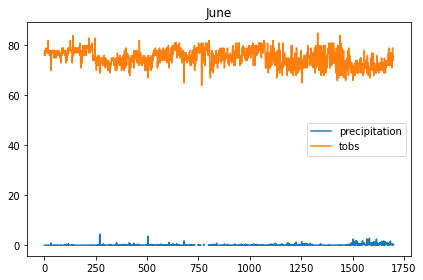

In [61]:
# plot
june_prcp.plot()
plt.title('June')
plt.tight_layout()

### 2. December - precipitation and temperature

In [62]:
# extracts date, precipitation, and temperature for the month of dec
dec_prcp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(
    extract('month', Measurement.date) == 12).all()

In [63]:
# df
dec_prcp = pd.DataFrame(dec_prcp, columns=['date','precipitation','tobs' ])

In [64]:
# drop index
print(dec_prcp.to_string(index=False))

      date  precipitation  tobs
2010-12-01           0.04  76.0
2010-12-03           0.00  74.0
2010-12-04           0.00  74.0
2010-12-06           0.00  64.0
2010-12-07           0.00  64.0
2010-12-08           0.00  67.0
2010-12-09           0.00  77.0
2010-12-10           1.58  66.0
2010-12-11           0.77  69.0
2010-12-12           0.00  68.0
2010-12-13           0.00  68.0
2010-12-14           0.00  71.0
2010-12-15           0.00  74.0
2010-12-16           0.00  67.0
2010-12-17           0.00  66.0
2010-12-18           0.00  69.0
2010-12-19           1.40  71.0
2010-12-23           0.00  70.0
2010-12-24           0.00  70.0
2010-12-26            NaN  74.0
2010-12-27           0.13  74.0
2010-12-28           0.55  71.0
2010-12-29           0.06  75.0
2010-12-30           0.01  75.0
2010-12-31           0.00  72.0
2011-12-01           0.03  69.0
2011-12-02           0.08  68.0
2011-12-03           0.00  73.0
2011-12-04           0.00  74.0
2011-12-05           0.00  73.0
2011-12-

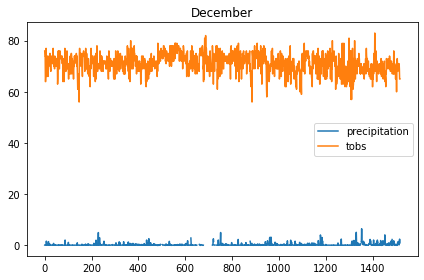

In [65]:
# plot
dec_prcp.plot()
plt.title('December')
plt.tight_layout()